In [236]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, clear_output
import tensorflow as tf
%matplotlib inline

In [58]:
from IPython.display import display, clear_output as clc

In [130]:
d0 = pd.read_csv ('train_final.csv', index_col=0)
d0.head ()

,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,0,0.107576,0,0.0,1,1,1,1,...,104,22902.0,1,0,18,0.042295,1,0,27,0.028250
2,0,1,0,0.142357,0,0.0,7,1,1,1,...,144,11400.0,1,0,8,0.021417,1,0,67,0.253574
3,0,1,0,0.492318,0,3.0,4205,1,1,3,...,112,4833.0,1,0,13,0.502212,1,1,35,0.373397
4,0,1,0,-0.053028,0,2.0,2,1,1,5,...,127,3250.0,1,1,8,0.000000,1,0,50,0.674254
5,0,1,0,0.730797,0,0.0,11,1,1,1,...,148,4000.0,1,1,5,0.787592,1,0,71,0.371157


In [145]:
import pandas as pd
from IPython.display import display

def stats(data, others=dict()):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame()
    stats = pd.concat([data.nunique(), data.dtypes, data.isnull().sum()], axis=1)
    stats.columns = ['Unique', 'Dtypes', 'NaN Count']
    for k,v in others.items():
        stats[k] = v(data)
    return stats

def page(data, wrap_cols=14):
    if not isinstance(data, pd.DataFrame):
        data = data.to_frame().T
    for i in range(wrap_cols, data.shape[1]+wrap_cols, wrap_cols):
        print ('Columns', i-wrap_cols, '-', min(i-1,data.shape[1]-1))
        display(data.iloc[:, i-wrap_cols:i])

In [166]:
page (d0.nunique ().T)
# page (d0.dtypes)
page (d0.isnull ().sum ())

Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,2,9,12,49998,9,11,1880,9,9,322,23,43,9,10


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,16,10,310,9,83,8770,10,334,55,42562,9,14,83,41705


Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,0,0,0,1268,0,0,0,0,0,0,0,0


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,0,0,0,0,0,9828,0,0,0,0,0,0,0,0


In [241]:
d1 = d0.fillna (method='ffill')
page (d1.isnull ().sum ())

Columns 0 - 13


,Y,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Columns 14 - 27


,F14,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24,F25,F26,F27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [255]:
page (d0.iloc[:,5].value_counts ())
page (d1.iloc[:,5].value_counts ())

Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
F5,29110,8682,6516,3129,977,232,55,18,8,2,1


Columns 0 - 10


,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
F5,29863,8904,6701,3202,1002,242,55,18,8,2,1


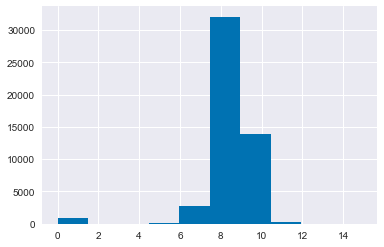

In [251]:
plt.hist (np.log1p (d1.iloc[:,19]))
pass

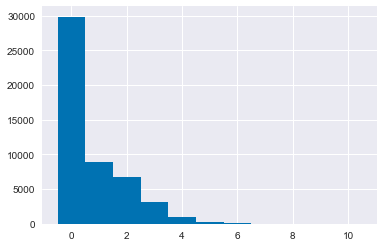

In [252]:
h = d1.iloc[:,5].value_counts ()
h = h[h>0]
ind = h.index
plt.bar (ind, h, width=1)
# plt.xscale ('log')
pass

In [217]:
continuous_cols = set ([3, 6, 9, 16, 19, 21, 23, 27])
categorical_cols = set (range (1, 28)) - continuous_cols
continuous_cols, categorical_cols

({3, 6, 9, 16, 19, 21, 23, 27},
 {1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 17, 18, 20, 22, 24, 25, 26})

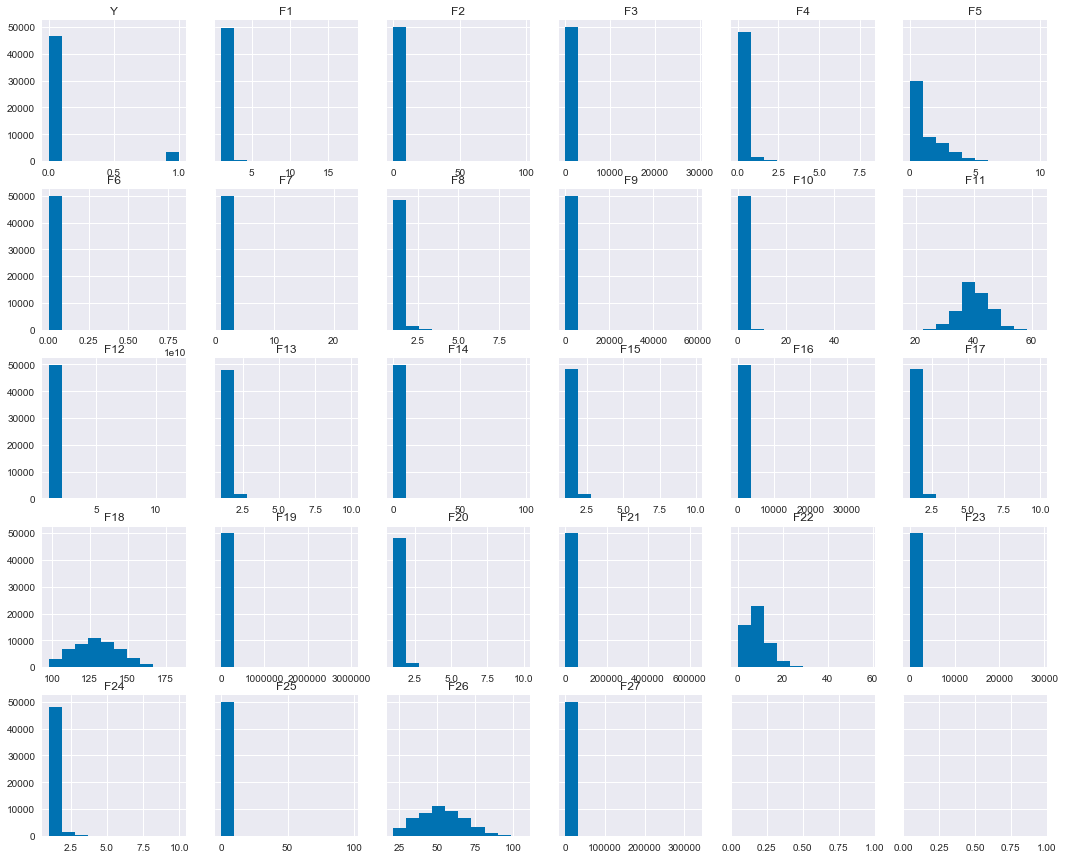

In [267]:
import math
cols = 6
rows = math.ceil (d1.shape[1]/cols)
fig, ax = plt.subplots (rows, cols, figsize=(3*cols,3*rows), sharey=True, squeeze=False)
for a, col in zip (ax.flat, d1):
    a.hist (d1[col])
    a.set_title (col)


In [272]:
a = [x for x in dir (tf) if '__' in x]
b = [getattr (tf, x) for x in a]
b

[{'ArithmeticError': ArithmeticError,
  'AssertionError': AssertionError,
  'AttributeError': AttributeError,
  'BaseException': BaseException,
  'BlockingIOError': BlockingIOError,
  'BrokenPipeError': BrokenPipeError,
  'BufferError': BufferError,
  'BytesWarning': BytesWarning,
  'ChildProcessError': ChildProcessError,
  'ConnectionAbortedError': ConnectionAbortedError,
  'ConnectionError': ConnectionError,
  'ConnectionRefusedError': ConnectionRefusedError,
  'ConnectionResetError': ConnectionResetError,
  'DeprecationWarning': DeprecationWarning,
  'EOFError': EOFError,
  'Ellipsis': Ellipsis,
  'EnvironmentError': OSError,
  'Exception': Exception,
  'False': False,
  'FileExistsError': FileExistsError,
  'FileNotFoundError': FileNotFoundError,
  'FloatingPointError': FloatingPointError,
  'FutureWarning': FutureWarning,
  'GeneratorExit': GeneratorExit,
  'IOError': OSError,
  'ImportError': ImportError,
  'ImportWarning': ImportWarning,
  'IndentationError': IndentationError,
 

In [ ]:
tf